In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.load("data/exams_part16_abs_age_1.npy")
data.shape

(772, 4096, 12)

In [3]:
df = pd.read_csv("data/exams.csv")
df.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5


In [4]:
age_data = df[
    (df['trace_file'] == 'exams_part16.hdf5') &
    (abs(df['nn_predicted_age'] - df['age']) <= 1.0) &
    (df['normal_ecg'])
]['age'].values

print(age_data.shape)
np.save('age_part16_abs_age_1.npy', age_data)


(772,)


In [10]:
df_16 = df[
    (df['trace_file'] == 'exams_part16.hdf5') &
    (abs(df['nn_predicted_age'] - df['age']) <= 1.0) &
    (df['normal_ecg'])
].reset_index(drop=True)
df_16.shape

(772, 15)

In [11]:
df_16.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1683849,35,False,35.244183,False,False,False,False,False,False,1397534,NaN,NaN,True,exams_part16.hdf5
1,1754825,49,False,49.684593,False,False,False,False,False,False,959059,NaN,NaN,True,exams_part16.hdf5
2,1689108,41,False,40.222874,False,False,False,False,False,False,1500679,False,1.101369,True,exams_part16.hdf5
3,1715430,48,False,47.940437,False,False,False,False,False,False,1499416,NaN,NaN,True,exams_part16.hdf5
4,1796928,41,True,41.678860,False,False,False,False,False,False,673061,False,0.915068,True,exams_part16.hdf5


In [5]:
data.shape

(772, 4096, 12)

In [6]:
data_0 = data[0, :, :]
data_0.shape

(4096, 12)

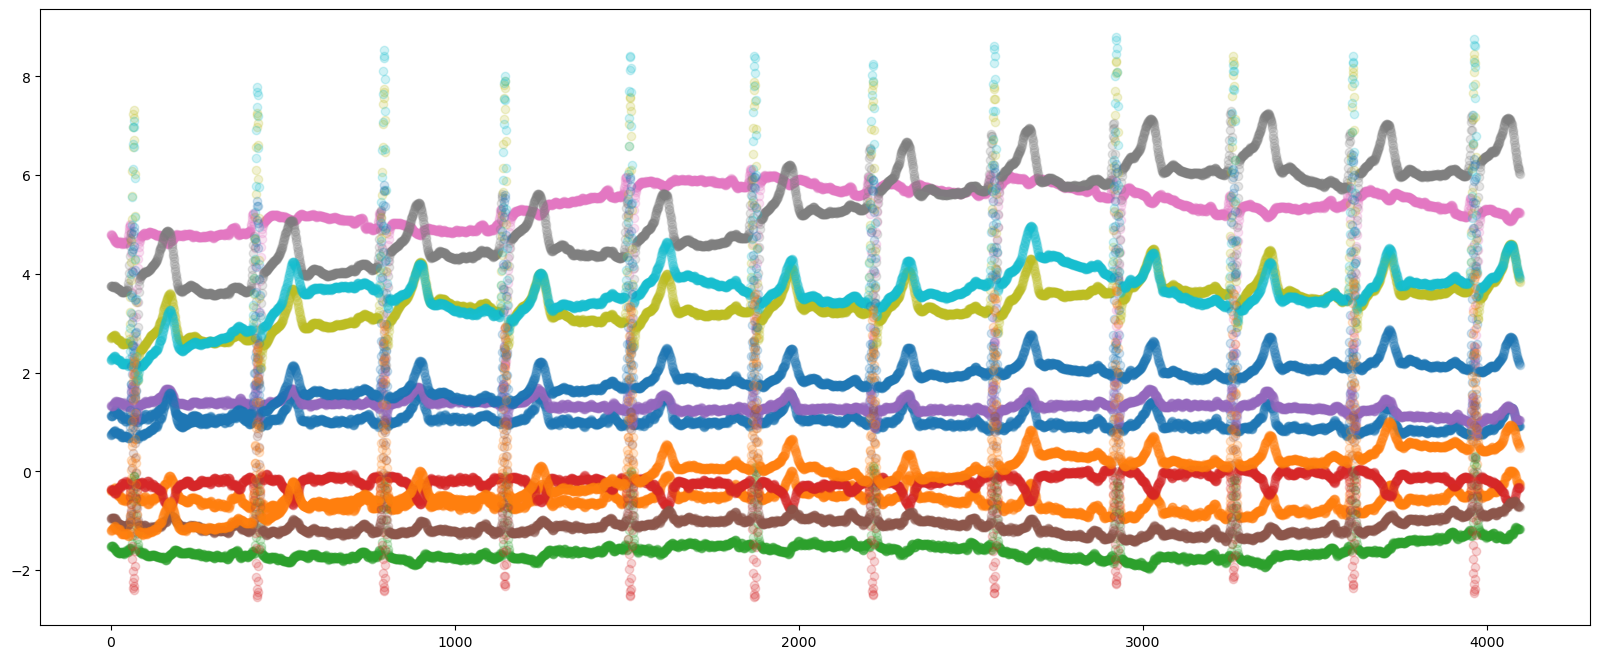

In [71]:
plt.figure(figsize=(20, 8))
for i in range(12):
    plt.scatter(range(4096), data_0[:, i], alpha=0.2)
plt.savefig('plots/eid_1683849_original_trace.jpg', bbox_inches='tight')
plt.show()

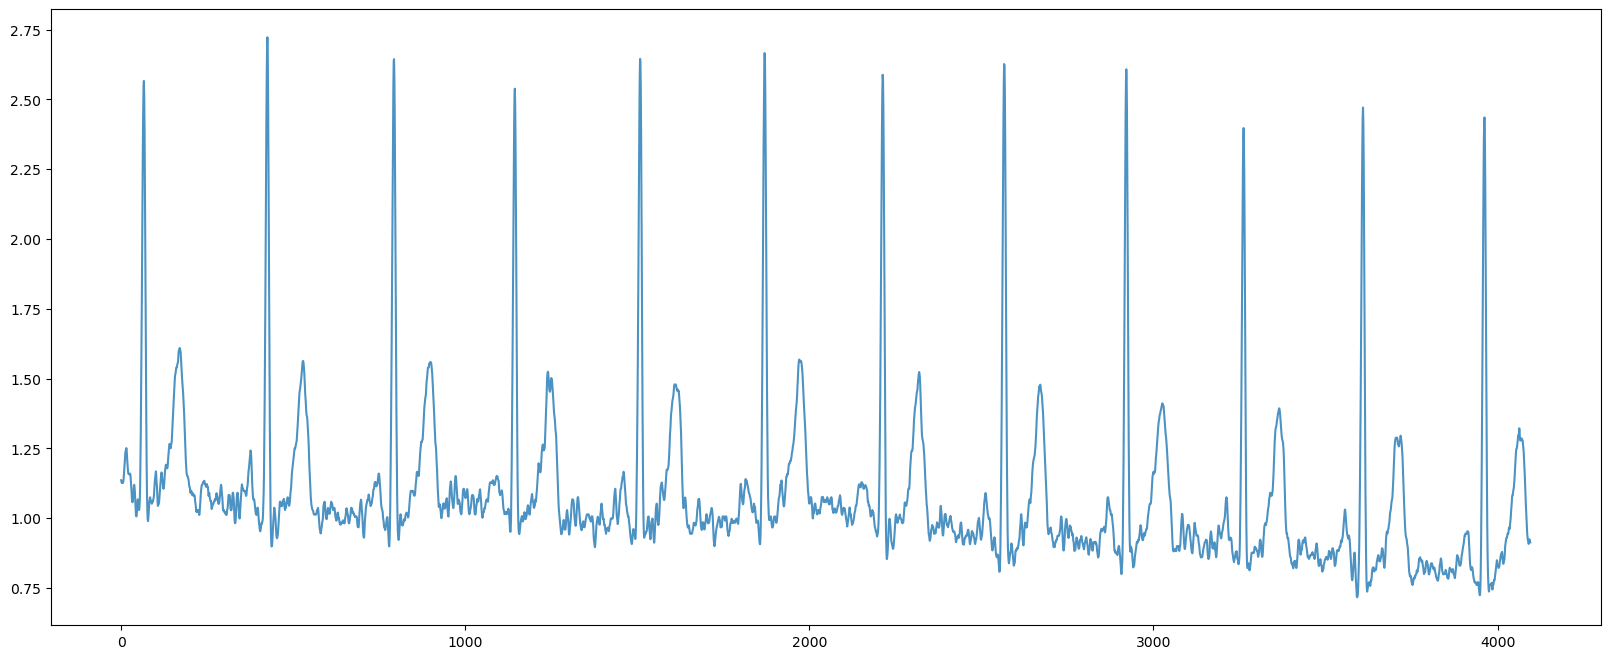

In [11]:
plt.figure(figsize=(20, 8))
for i in range(1):
    plt.plot(range(4096), data_0[:, i], alpha=0.8)


In [14]:
xr = np.load('output/reconstructed_trace.npy')
xr.shape

(772, 4096, 12)

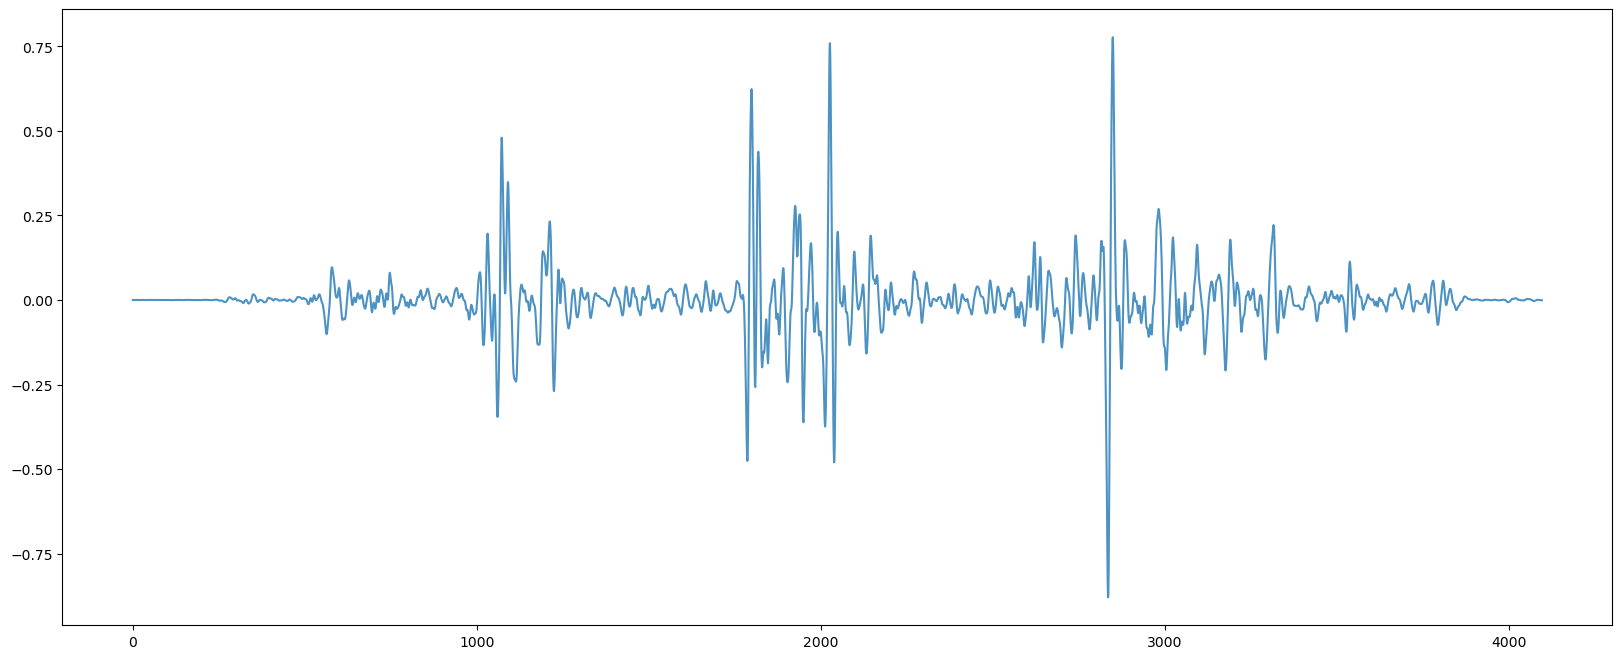

In [13]:
plt.figure(figsize=(20, 8))
for i in range(1):
    plt.plot(range(4096), xr[0, :, i], alpha=0.8)


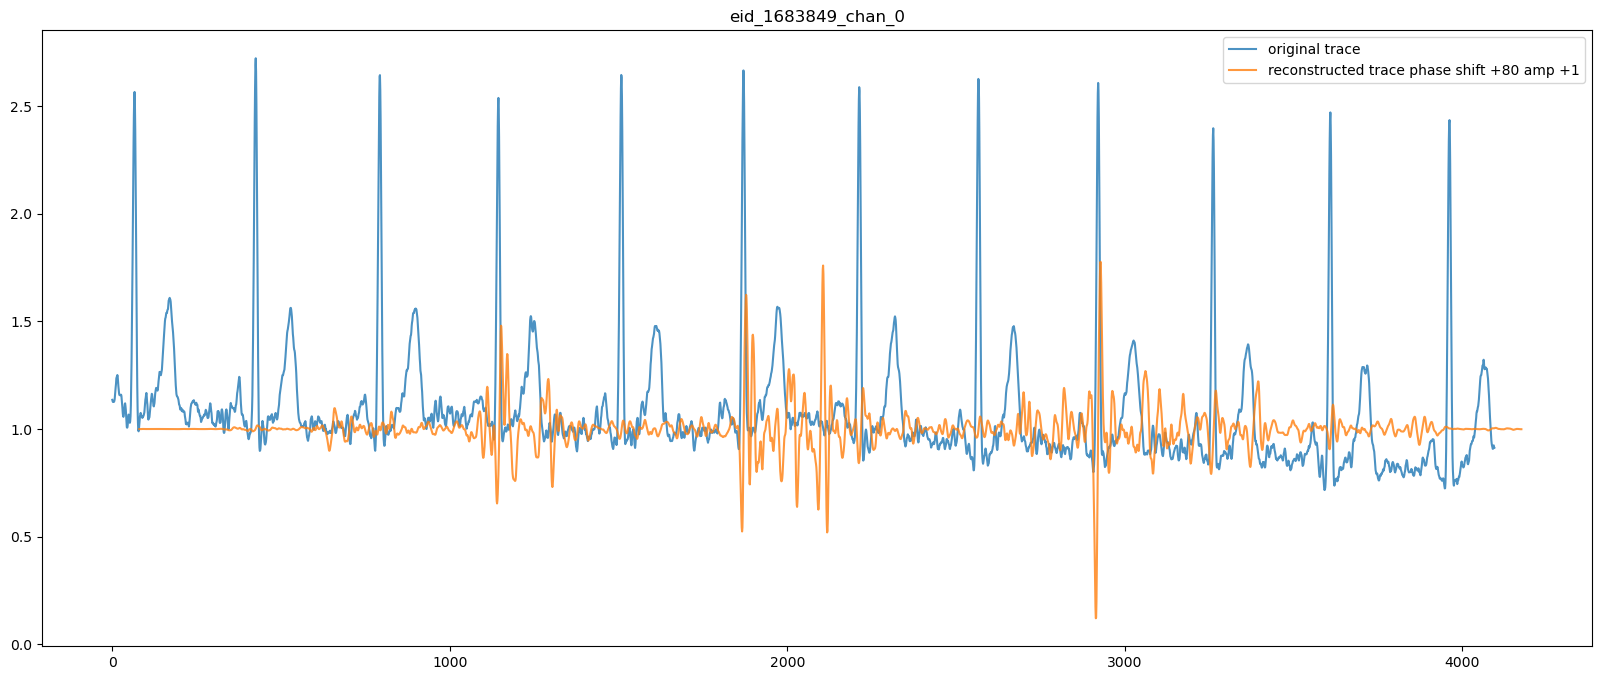

In [76]:
i = 0
plt.figure(figsize=(20, 8))
plt.plot(range(4096), (data[0, :, i]), alpha=0.8, label='original trace')
plt.plot([t+80 for t in range(4096)], xr[0, :, i] + 1, alpha=0.8, label='reconstructed trace phase shift +80 amp +1')
plt.title(f'eid_1683849_chan_{i}')
plt.legend()
plt.savefig('plots/eid_1683849_chan_0.png', bbox_inches='tight')
plt.plot()
plt.show()

[]

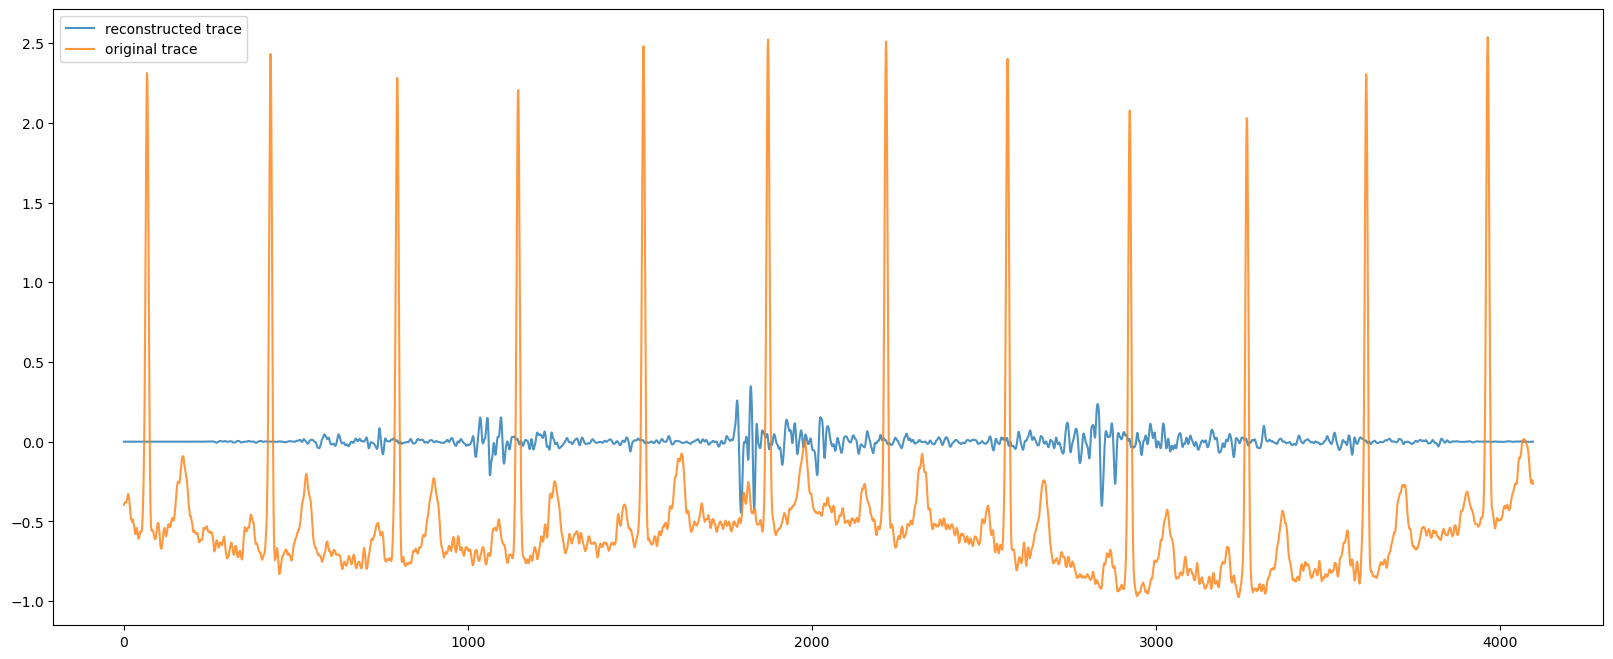

In [39]:
i = 1
plt.figure(figsize=(20, 8))
plt.plot([t + 0 for t in range(4096)], xr[0, :, i], alpha=0.8, label='reconstructed trace')
plt.plot(range(4096), (data[0, :, i]), alpha=0.8, label='original trace')
plt.legend()
plt.plot()

[]

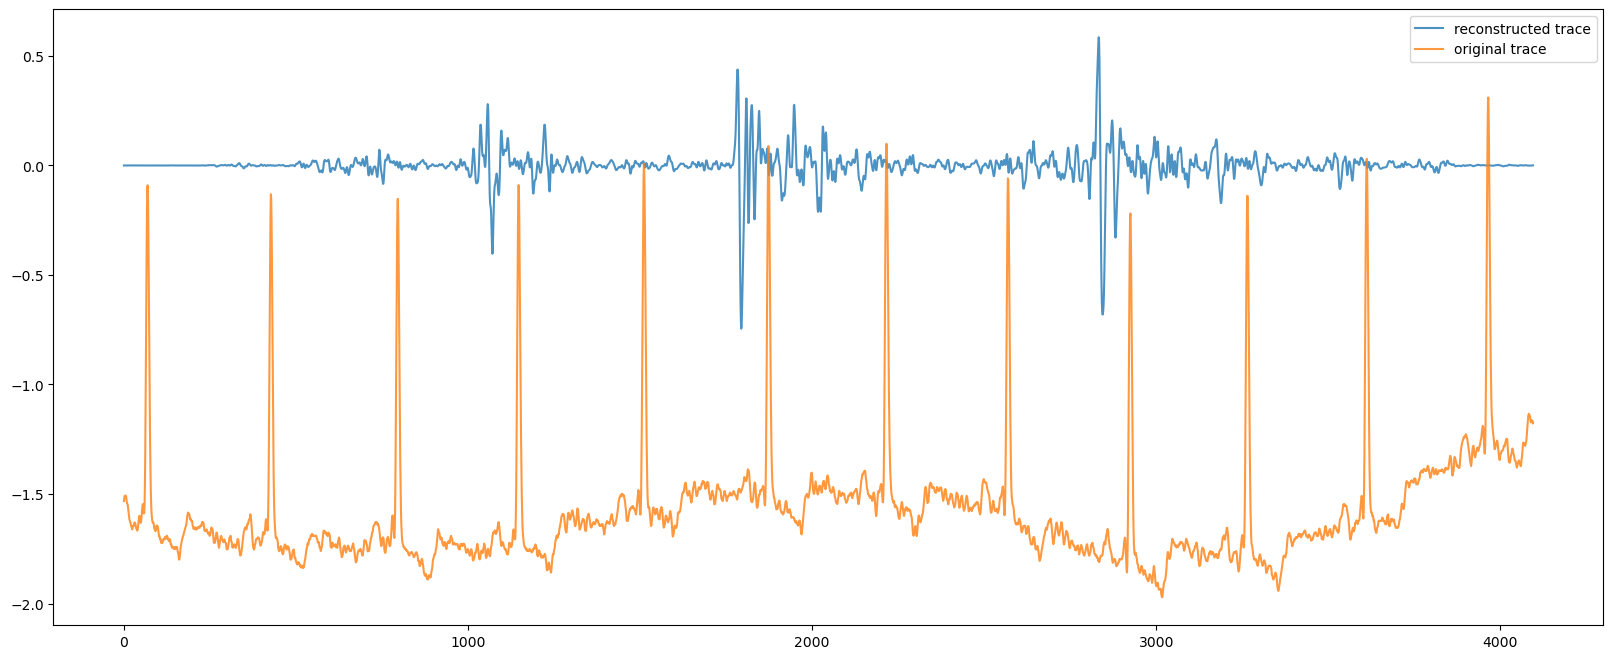

In [43]:
i = 2
plt.figure(figsize=(20, 8))
plt.plot([t + 0 for t in range(4096)], xr[0, :, i], alpha=0.8, label='reconstructed trace')
plt.plot(range(4096), (data[0, :, i]), alpha=0.8, label='original trace')
plt.legend()
plt.plot()

[]

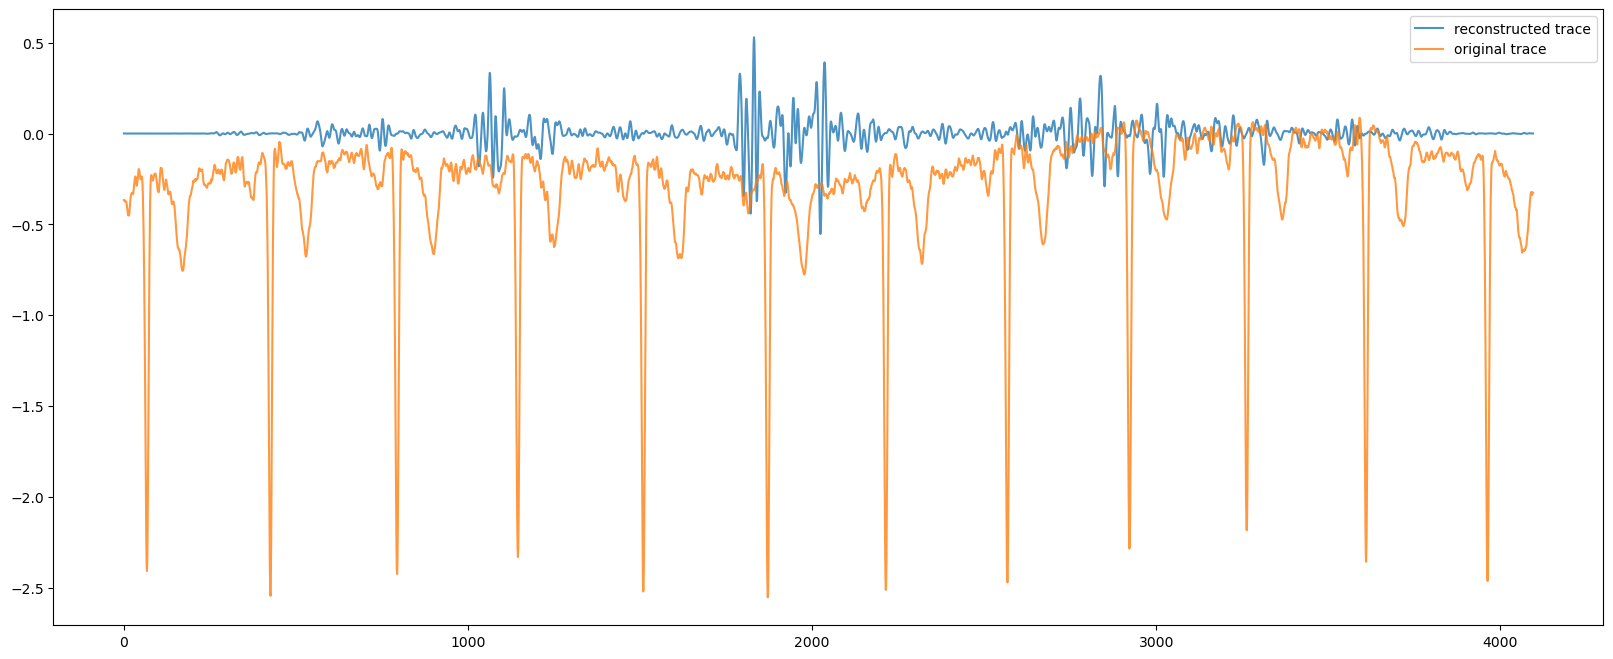

In [44]:
i = 3
plt.figure(figsize=(20, 8))
plt.plot([t + 0 for t in range(4096)], xr[0, :, i], alpha=0.8, label='reconstructed trace')
plt.plot(range(4096), (data[0, :, i]), alpha=0.8, label='original trace')
plt.legend()
plt.plot()

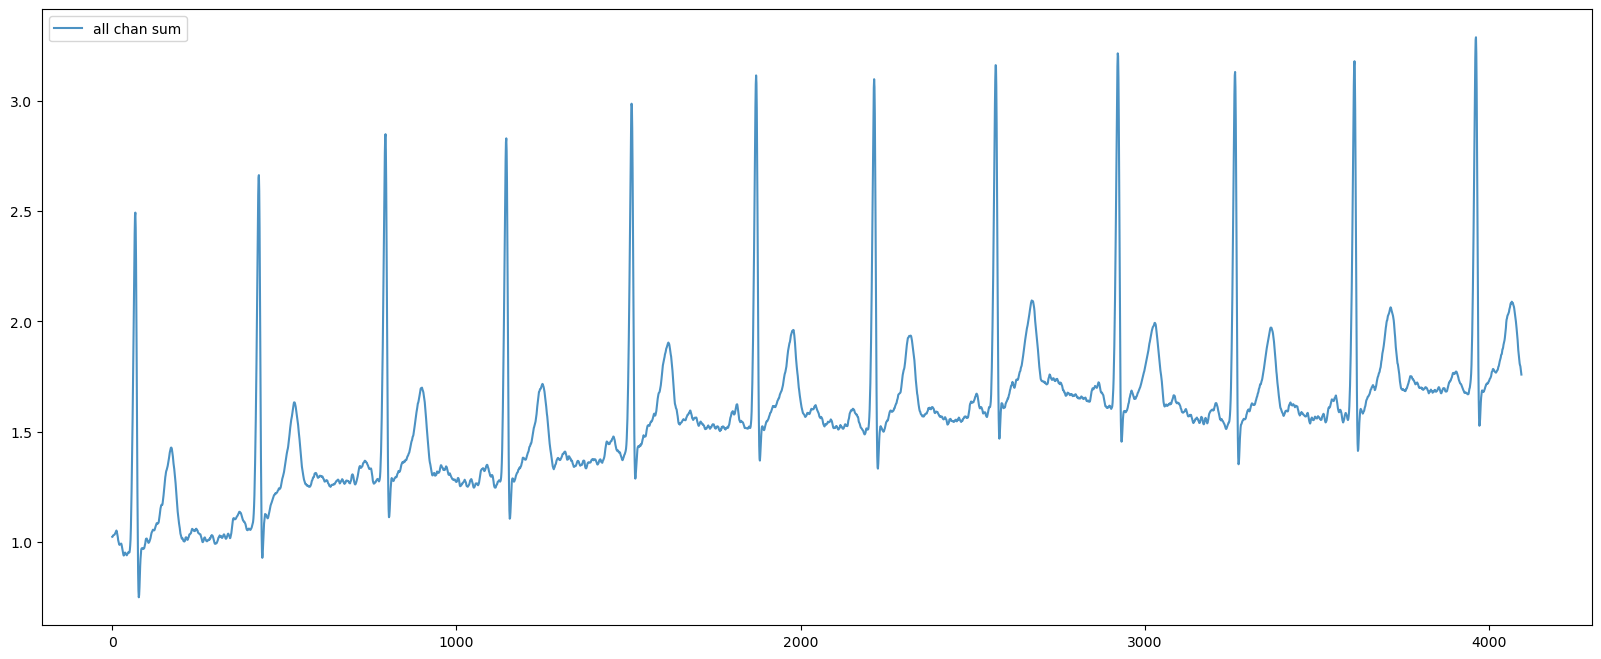

In [49]:
plt.figure(figsize=(20, 8))
plt.plot([t for t in range(4096)], (data[0, :, :].sum(axis=1))/12, alpha=0.8, label='all chan sum')
plt.legend()
plt.show()


## All channels

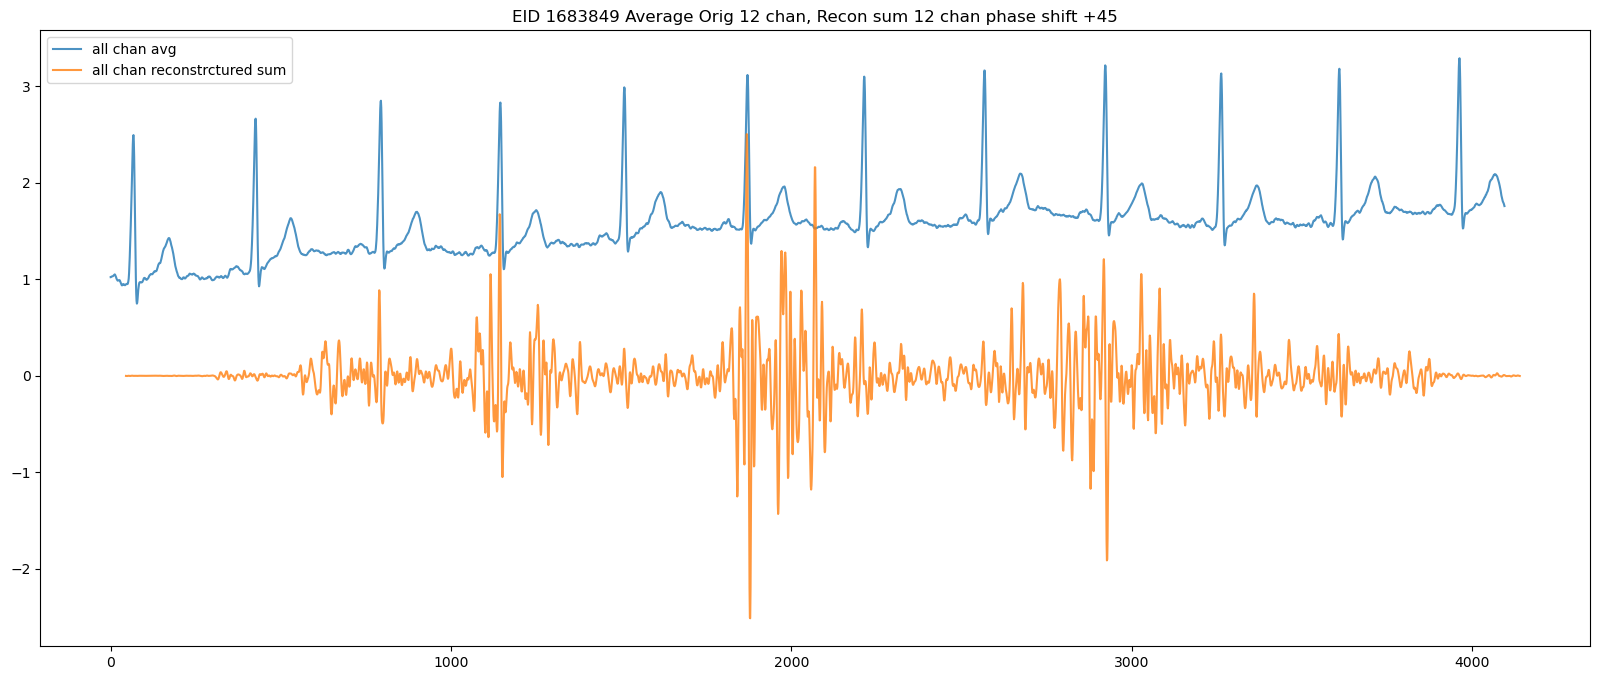

In [78]:
plt.figure(figsize=(20, 8))
plt.plot([t for t in range(4096)], (data[0, :, :].sum(axis=1))/12, alpha=0.8, label='all chan avg')
plt.plot([t + 45 for t in range(4096)], (xr[0, :, :].sum(axis=1)), alpha=0.8, label='all chan reconstrctured sum')
plt.title("EID 1683849 Average Orig 12 chan, Recon sum 12 chan phase shift +45")
plt.legend()
plt.savefig('plots/eid_1683849_traces_orig_avg_recon_sum_phase_shift_45.jpg', bbox_inches='tight')

plt.plot()
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot([t for t in range(4096)], (xr[0, :, :].sum(axis=1))/12, alpha=0.8, label='all chan reconstrctured sum')
plt.legend()
plt.show()


[]

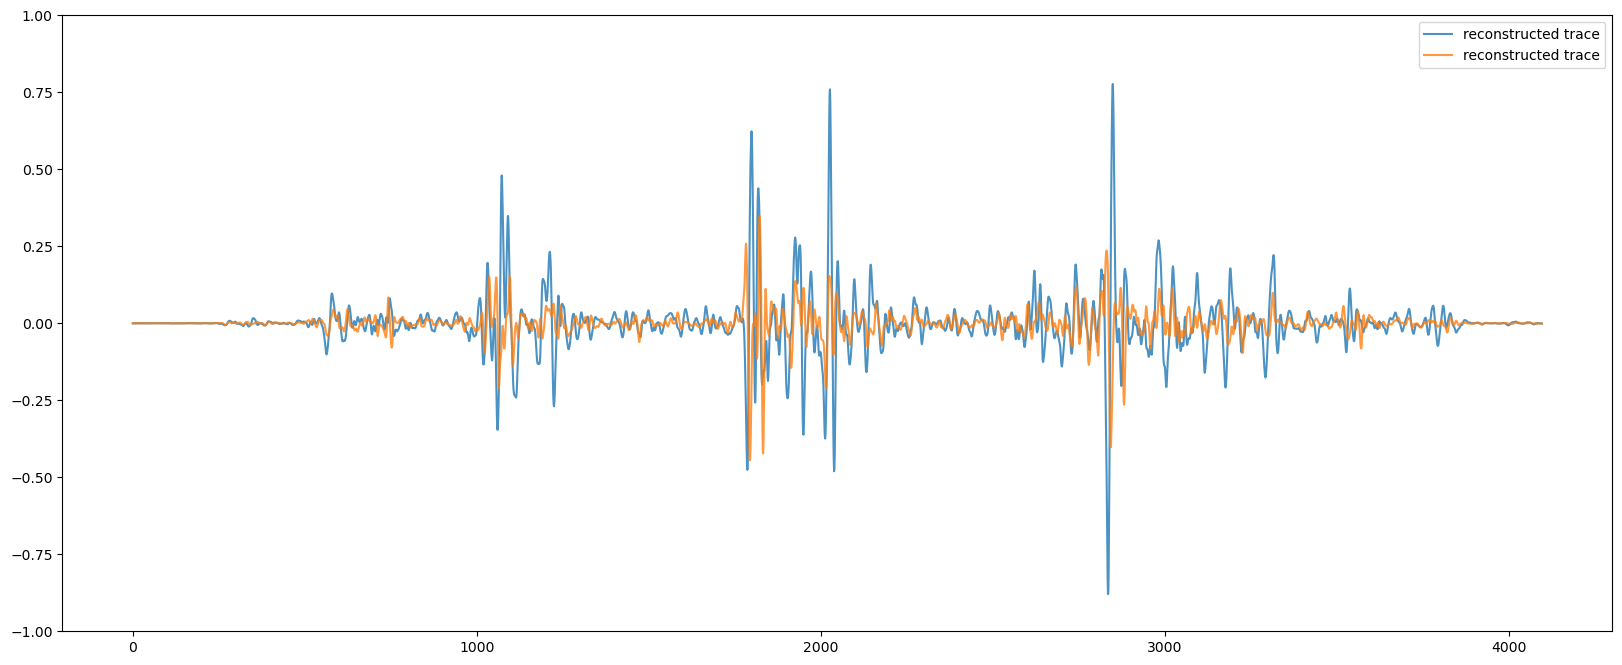

In [36]:
i = 0
plt.figure(figsize=(20, 8))
plt.plot([t + 0 for t in range(4096)], xr[0, :, i], alpha=0.8, label='reconstructed trace')
plt.plot([t + 0 for t in range(4096)], xr[0, :, i+1], alpha=0.8, label='reconstructed trace')
plt.ylim(-1, 1)
plt.legend()
plt.plot()

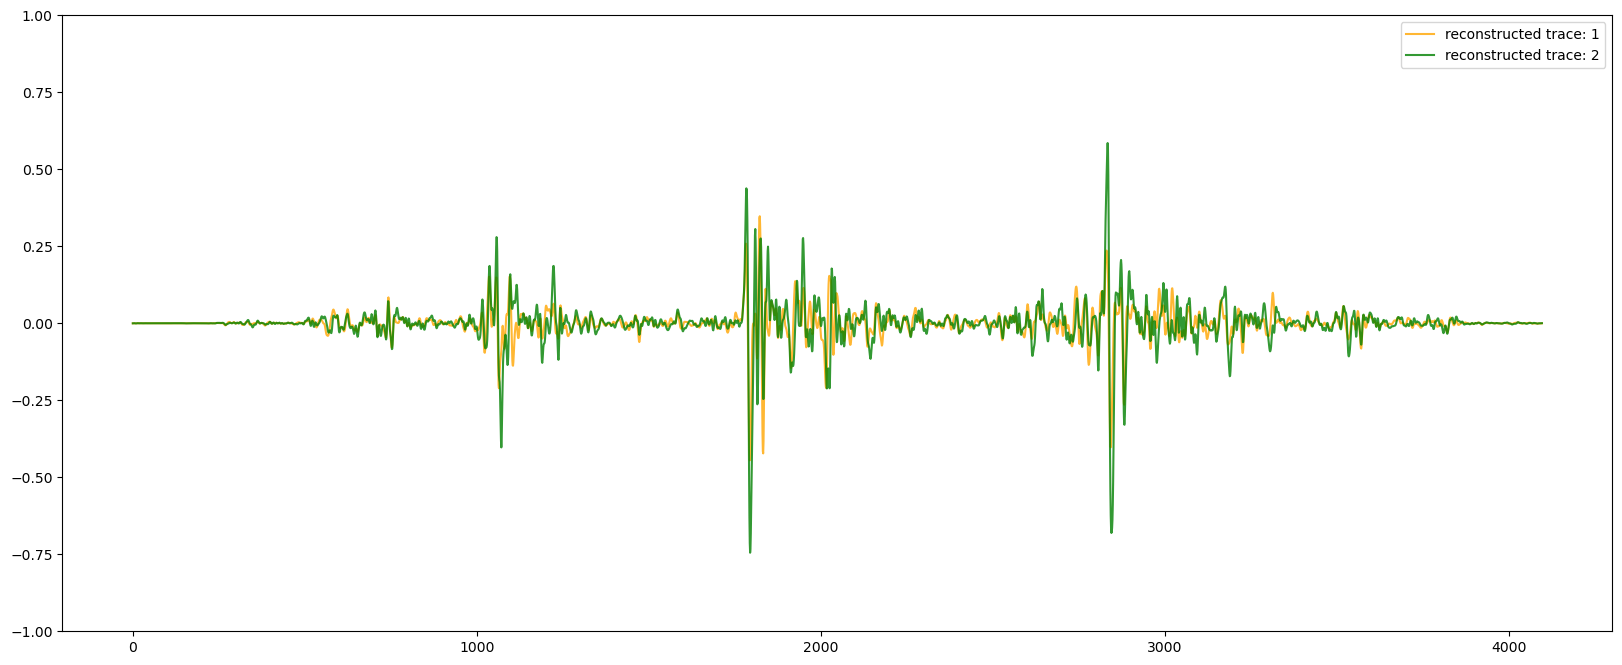

In [37]:
i = 1
j = 2
plt.figure(figsize=(20, 8))
plt.plot([t + 0 for t in range(4096)], xr[0, :, i], alpha=0.8, color='orange', label=f'reconstructed trace: {i}')
plt.plot([t + 0 for t in range(4096)], xr[0, :, j], alpha=0.8, color='green', label=f'reconstructed trace: {j}')
plt.ylim(-1, 1)

plt.legend()
plt.plot()
plt.show()

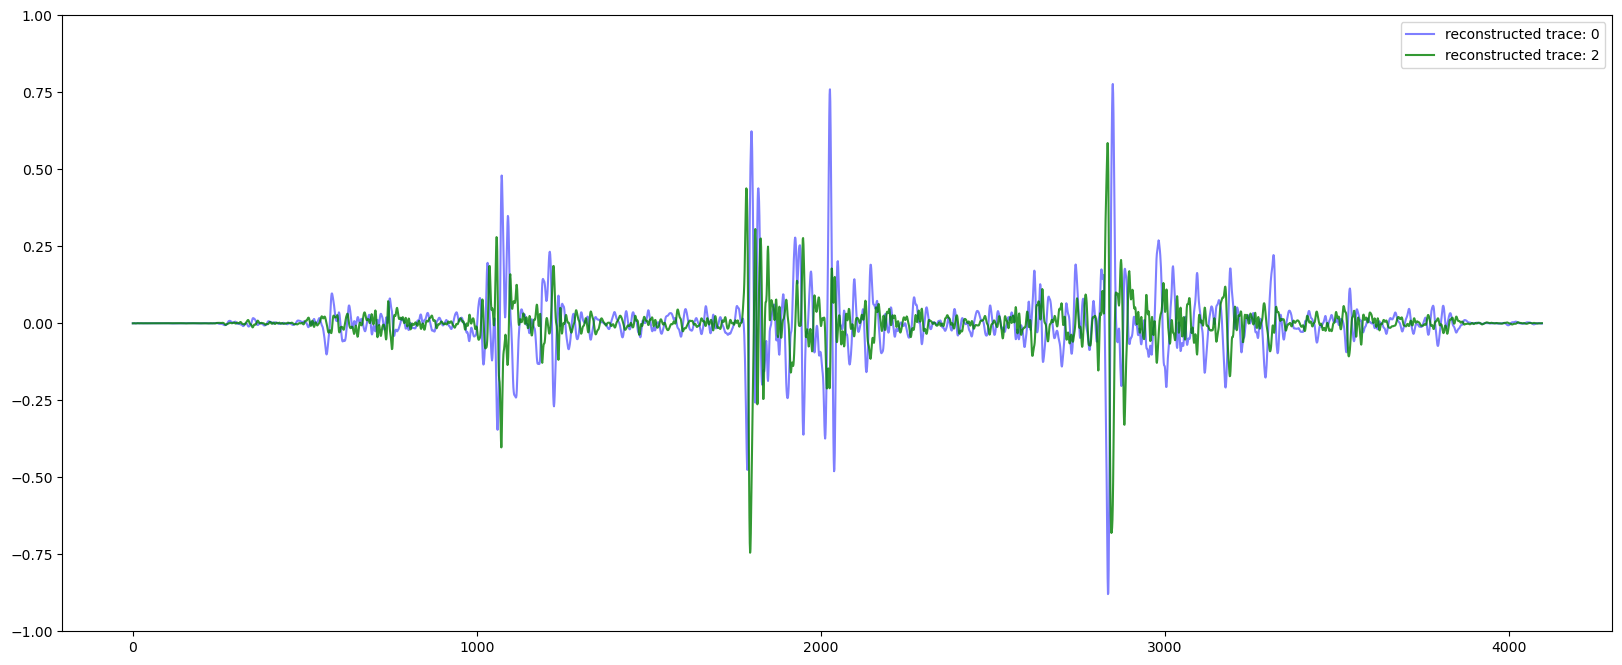

In [38]:
i = 0
j = 2
plt.figure(figsize=(20, 8))
plt.plot([t + 0 for t in range(4096)], xr[0, :, i], alpha=0.5, color='blue', label=f'reconstructed trace: {i}')
plt.plot([t + 0 for t in range(4096)], xr[0, :, j], alpha=0.8, color='green', label=f'reconstructed trace: {j}')
plt.ylim(-1, 1)
plt.legend()
plt.plot()
plt.show()

In [67]:
recon_2d = xr.reshape(xr.shape[0], -1)
recon_2d.shape
np.savetxt("part16/reconstructed_trace_16.csv", recon_2d, delimiter=",")


In [68]:
trace_2d = data.reshape(data.shape[0], -1)
print(trace_2d.shape)
np.savetxt("part16/original_trace.csv", recon_2d, delimiter=",")


(772, 49152)


In [6]:
df

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345774,1123951,33,True,35.893005,False,False,False,False,False,False,770553,False,2.189039,True,exams_part2.hdf5
345775,954704,73,False,68.169136,False,False,False,False,False,False,1044781,False,2.520546,False,exams_part2.hdf5
345776,589697,75,False,78.080810,False,False,False,False,False,False,1020589,False,3.304107,False,exams_part2.hdf5
345777,2780563,44,False,73.120636,False,False,False,False,False,False,178,False,7.339720,False,exams_part2.hdf5


In [12]:
df_16[df_16.index == 16]

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
16,1723199,27,True,27.620527,False,False,False,False,False,False,259831,False,1.043835,True,exams_part16.hdf5


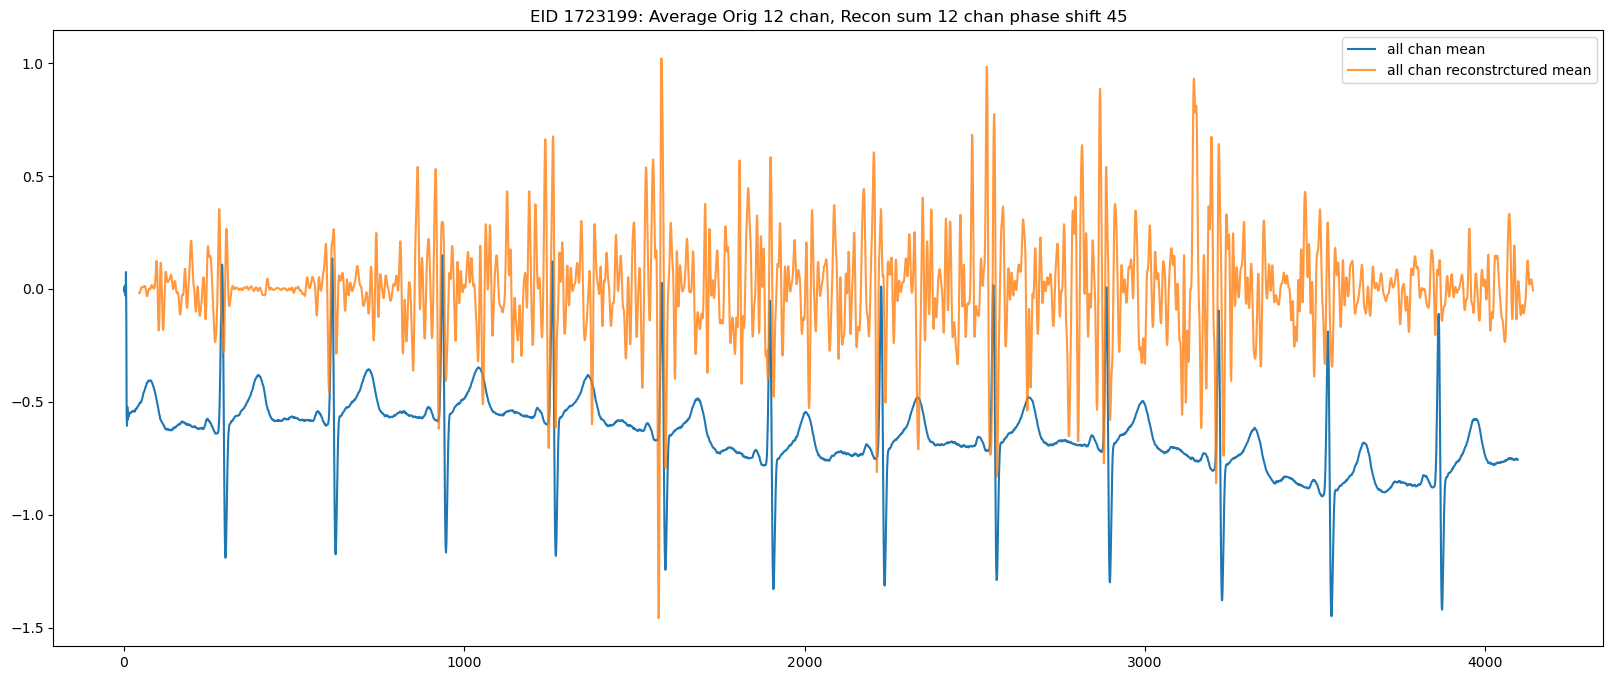

In [65]:
plt.figure(figsize=(20, 8))
i = 16

eid = int(df_16[df_16.index == i]['exam_id'].values[0])
phase = 45

plt.plot([t for t in range(4096)], (data[i, :, :].mean(axis=1)), label='all chan mean')
plt.plot([t + phase for t in range(4096)], (xr[i, :, :].mean(axis=1))/4, alpha=0.8, label='all chan reconstrctured mean')
plt.title(f"EID {eid}: Average Orig 12 chan, Recon sum 12 chan phase shift {phase}")
plt.legend()
plt.savefig(f'plots/eid_{eid}_traces_orig_avg_recon_sum_phase_shift_{phase}.jpg', bbox_inches='tight')
4
plt.plot()
plt.show()

In [62]:
df_16[df_16['age'] < 30]

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
16,1723199,27,True,27.620527,False,False,False,False,False,False,259831,False,1.043835,True,exams_part16.hdf5
25,1724800,27,False,27.569683,False,False,False,False,False,False,1437297,NaN,NaN,True,exams_part16.hdf5
26,1802068,29,True,29.352028,False,False,False,False,False,False,1483824,False,0.904109,True,exams_part16.hdf5
27,1786838,19,True,19.840757,False,False,False,False,False,False,1002536,False,0.934246,True,exams_part16.hdf5
30,1681321,28,True,27.956104,False,False,False,False,False,False,258520,NaN,NaN,True,exams_part16.hdf5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,1772524,18,True,18.769697,False,False,False,False,False,False,1537680,False,0.961643,True,exams_part16.hdf5
744,1821372,25,False,24.148485,False,False,False,False,False,False,575568,False,0.871232,True,exams_part16.hdf5
761,1764949,26,False,25.092964,False,False,False,False,False,False,1482628,False,0.969862,True,exams_part16.hdf5
763,1697172,25,True,25.089092,False,False,False,False,False,False,1580838,False,1.084931,True,exams_part16.hdf5


In [66]:
import pandas as pd

In [67]:
df = pd.read_csv("part16/exams_16.csv")
df.shape

(772, 15)

In [69]:
data = np.load("data/exams_part16_abs_age_1.npy")
data.shape

(772, 4096, 12)

In [72]:
data_ = np.reshape(data, (772, 4096 * 12))
np.savetxt("part16/original_trace.csv", data_, delimiter=",")
data_.shape

(772, 49152)

In [75]:
xr.shape
xr_ = np.reshape(xr, (772, 4096 * 12))
xr_.shape
                 

(772, 49152)

In [76]:
np.savetxt("part16/reconstructed_trace_16.csv", xr_, delimiter=",")

In [1]:
import numpy as np
import h5py

In [4]:
import sys
sys.path.append("../")
from read_data import get_exam_ids_per_file, extract_selected_tracings

In [5]:
trace_path_file, ids_popln = get_exam_ids_per_file()

FileNotFoundError: [Errno 2] No such file or directory: 'data/exams.csv'